In [1]:
# Import necessary libraries
import sys
sys.path.append("../")


import pandas as pd
import random
import math
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from src.perform_database_operations import perform_database_operations
from src.preprocessing import PreprocessingUtils
from src.visualization import VisualizationUtils


## Configuration

In [2]:
config_file_path = '../config_database.json'  # Path to the database configuration file
database_name = 'telecom'  # Name of the database to connect to
sql_query = 'SELECT * FROM xdr_data'  # SQL query to retrieve data

## Data Acquisition

In [3]:
def get_data(config_file_path, database_name, sql_query):
    """Fetches data from the specified database using the provided configuration and query.

    Args:
        config_file_path (str): Path to the JSON file containing database credentials.
        database_name (str): Name of the database to connect to.
        sql_query (str): SQL query to execute for data retrieval.

    Returns:
        pandas.DataFrame: The retrieved data as a pandas DataFrame.
    """

    df = perform_database_operations(config_file_path, database_name, sql_query)
    return df

df = get_data(config_file_path, database_name, sql_query)

## Data Exploration

In [4]:
df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,1.311448e+19,4/4/2019 12:01,770.0,4/25/2019 14:35,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9.16456699548519E+015,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,1.311448e+19,4/9/2019 13:04,235.0,4/25/2019 8:15,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,1.311448e+19,4/9/2019 17:42,1.0,4/25/2019 11:58,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,1.311448e+19,4/10/2019 0:31,486.0,4/25/2019 7:36,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,1.311448e+19,4/12/2019 20:10,565.0,4/25/2019 10:40,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [5]:
df.describe()

,Bearer Id,Start ms,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
count,1.490100e+05,150000.000000,150000.000000,1.500000e+05,1.494310e+05,1.489350e+05,1.494290e+05,122172.000000,122189.000000,150000.000000,...,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500010e+05,1.500000e+05,1.500000e+05
mean,1.013887e+19,499.188200,498.800880,1.046086e+05,2.082016e+14,4.188282e+10,4.847455e+13,109.795706,17.662883,13300.045927,...,1.163407e+07,1.100941e+07,1.162685e+07,1.100175e+07,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.112121e+07,4.546434e+08
std,2.893173e+18,288.611834,288.097653,8.103762e+04,2.148809e+10,2.447443e+12,2.241637e+13,619.782739,84.793524,23971.878541,...,6.710569e+06,6.345423e+06,6.725218e+06,6.359490e+06,2.439675e+08,4.782700e+06,2.432050e+08,4.769004e+06,1.127639e+07,2.441429e+08
min,6.917538e+18,0.000000,0.000000,7.142000e+03,2.040471e+14,3.360100e+10,4.400152e+11,0.000000,0.000000,0.000000,...,5.300000e+01,1.050000e+02,4.200000e+01,3.500000e+01,2.516000e+03,5.900000e+01,3.290000e+03,1.480000e+02,2.866892e+06,7.114041e+06
25%,7.349883e+18,250.000000,251.000000,5.744050e+04,2.082014e+14,3.365130e+10,3.546071e+13,32.000000,2.000000,43.000000,...,5.833501e+06,5.517965e+06,5.777156e+06,5.475981e+06,2.104733e+08,4.128476e+06,2.101869e+08,4.145943e+06,3.322201e+07,2.431068e+08
50%,7.349883e+18,499.000000,500.000000,8.639900e+04,2.082015e+14,3.366371e+10,3.572201e+13,45.000000,5.000000,63.000000,...,1.161602e+07,1.101345e+07,1.164222e+07,1.099638e+07,4.234081e+08,8.291208e+06,4.218030e+08,8.267071e+06,4.114331e+07,4.558411e+08
75%,1.304243e+19,749.000000,750.000000,1.324302e+05,2.082018e+14,3.368349e+10,8.611970e+13,70.000000,15.000000,19710.750000,...,1.744852e+07,1.651556e+07,1.747048e+07,1.650727e+07,6.331742e+08,1.243162e+07,6.316918e+08,1.238415e+07,4.903424e+07,6.657055e+08
max,1.318654e+19,999.000000,999.000000,1.859336e+06,2.140743e+14,8.823971e+14,9.900120e+13,96923.000000,7120.000000,378160.000000,...,2.325910e+07,2.201196e+07,2.325919e+07,2.201196e+07,8.434419e+08,1.655879e+07,8.434425e+08,1.655882e+07,7.833131e+07,9.029696e+08


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   Bearer Id                                 149010 non-null  float64
 1   Start                                     150000 non-null  object 
 2   Start ms                                  150000 non-null  float64
 3   End                                       150000 non-null  object 
 4   End ms                                    150000 non-null  float64
 5   Dur. (ms)                                 150000 non-null  float64
 6   IMSI                                      149431 non-null  float64
 7   MSISDN/Number                             148935 non-null  float64
 8   IMEI                                      149429 non-null  float64
 9   Last Location Name                        148848 non-null  object 
 10  Avg RTT DL (ms)     

`Start` and `End` columns datatypes are wrong.

Some of columns have null elements.

## Visualization

In [6]:
visualize = VisualizationUtils()

#### Handset Type Analysis

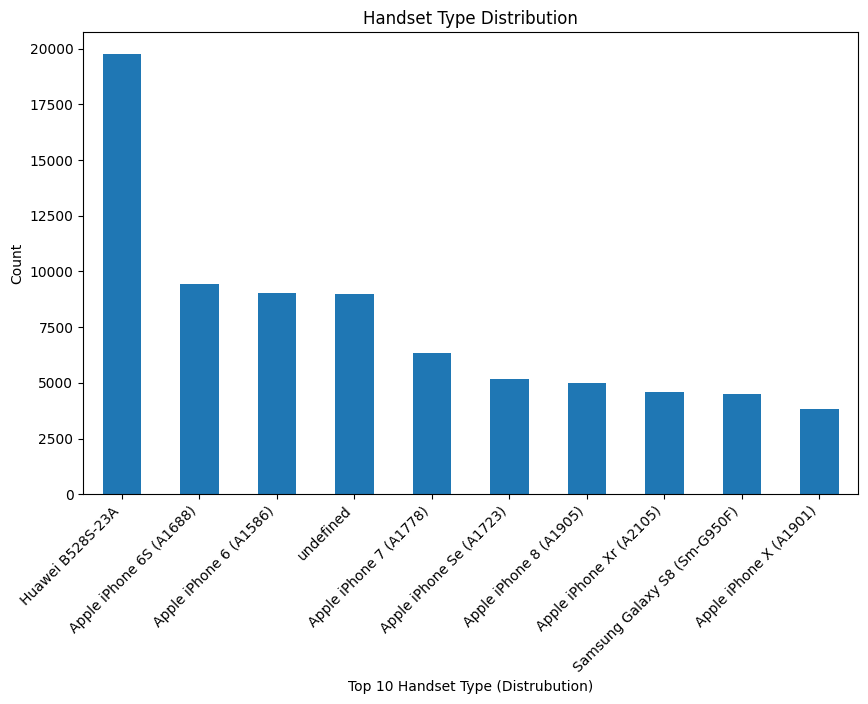

In [65]:
top_10_handset_type = df['Handset Type'].value_counts().head(10)

visualize.plot_bar(top_10_handset_type,
                   xlabel="Top 10 Handset Type (Distrubution)",
                   ylabel='Count',
                   title='Handset Type Distribution')

#### Handset Manufacturer Analysis

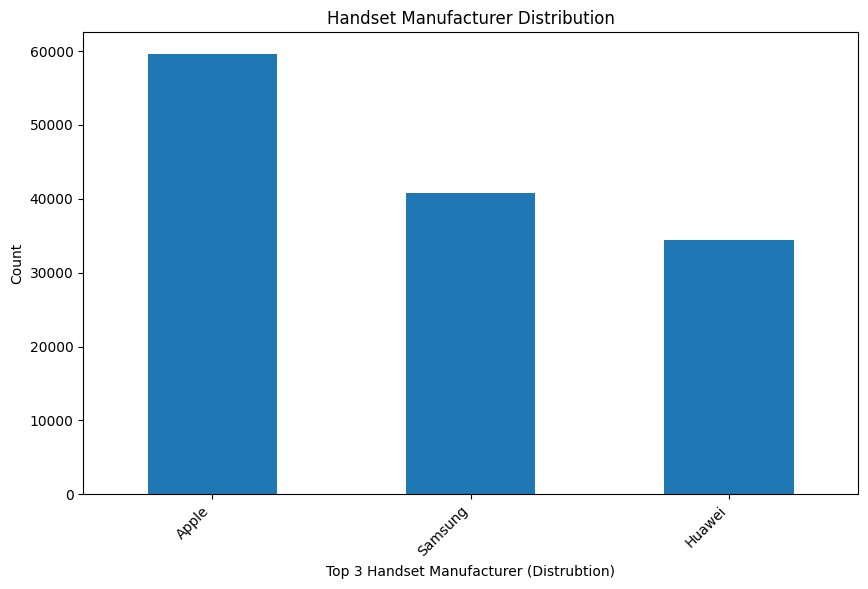

In [9]:
top_3_manufacturers = df['Handset Manufacturer'].value_counts().head(3)

visualize.plot_bar(top_3_manufacturers,
                   xlabel="Top 3 Handset Manufacturer (Distrubtion)",
                   ylabel='Count',
                   title='Handset Manufacturer Distribution')

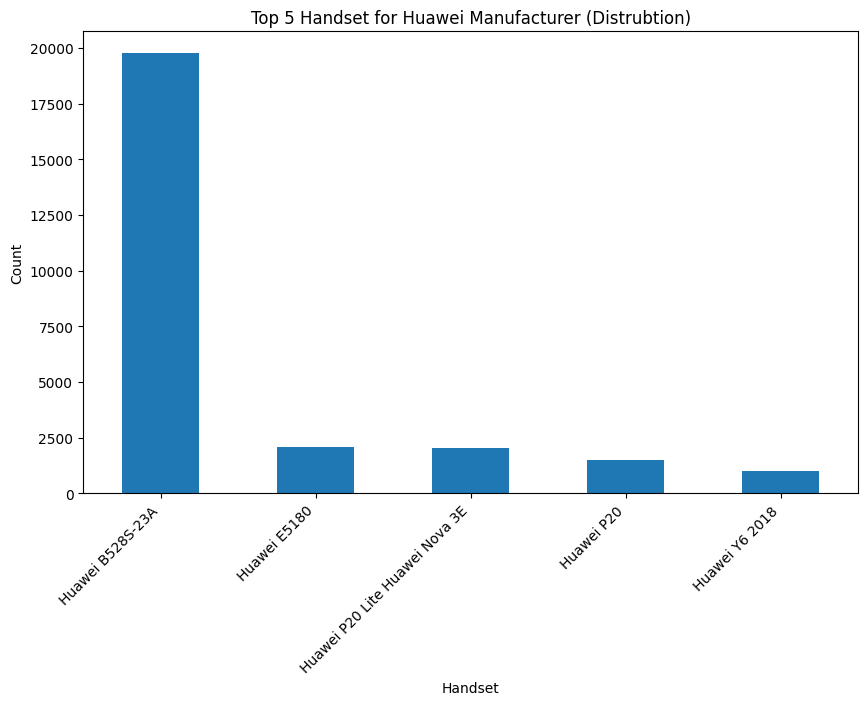

In [10]:
top_5_handsets_per_manufacturer = {}
for manufacturer in top_3_manufacturers.index:
    top_5_handsets_per_manufacturer[manufacturer] = df[df['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)

choosen_manufacturer = 'Huawei'
visualize.plot_bar(top_5_handsets_per_manufacturer[choosen_manufacturer],
                   title=f"Top 5 Handset for {choosen_manufacturer} Manufacturer (Distrubtion)",
                   ylabel='Count',
                   xlabel='Handset')

## Numerical Feature Analysis

In [11]:
numerical_cols = df.select_dtypes(include='number').columns.tolist()

In [12]:
def get_numerical_cols_subset(numerical_cols, max_cols=9):
    """Selects a subset of numerical columns, handling cases with less than max_cols columns.

    Args:
        numerical_cols (list): List of all numerical column names.
        max_cols (int, optional): Maximum number of columns to include in the subset. Defaults to 9.

    Returns:
        list: A list of numerical column names for the subset.
    """

    if len(numerical_cols) > max_cols:
        numerical_cols_subset = random.sample(numerical_cols, max_cols)
    else:
        numerical_cols_subset = numerical_cols
    return numerical_cols_subset

numerical_cols_subset = get_numerical_cols_subset(numerical_cols)

#### Distribution Analysis with Histograms

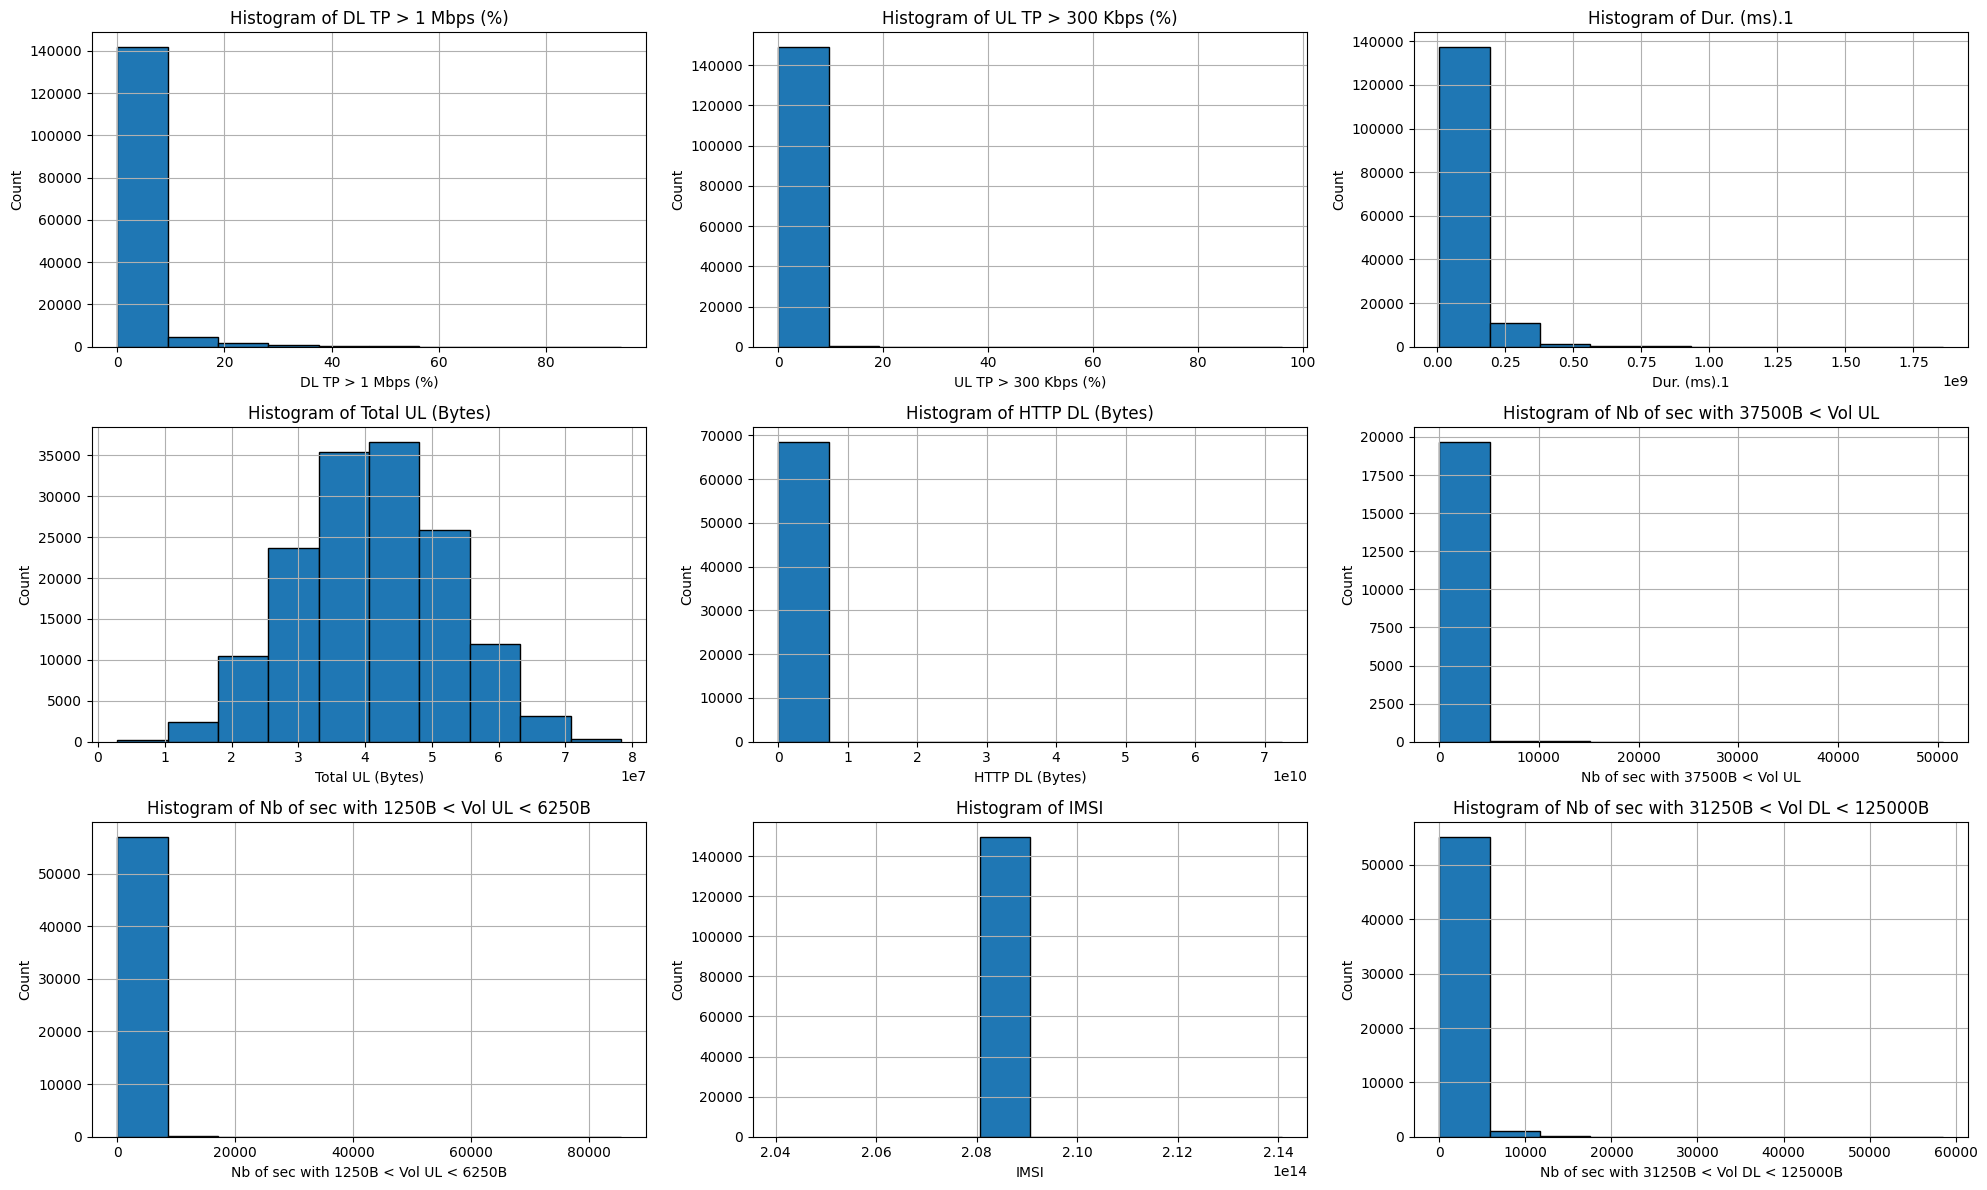

In [13]:
# Calculate grid dimensions based on number of columns in the subset
num_cols = 3  # Choose a fixed number of columns for the subplots
num_rows = math.ceil(len(numerical_cols_subset) / num_cols)

# Create the subplots (fixed grid size)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

for i, col in enumerate(numerical_cols_subset):
    visualize.plot_hist(df, col, ax=axes[i])

# Hide extra subplots (if any)
for j in range(len(numerical_cols_subset), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

#### Outlier Analysis with Boxplots

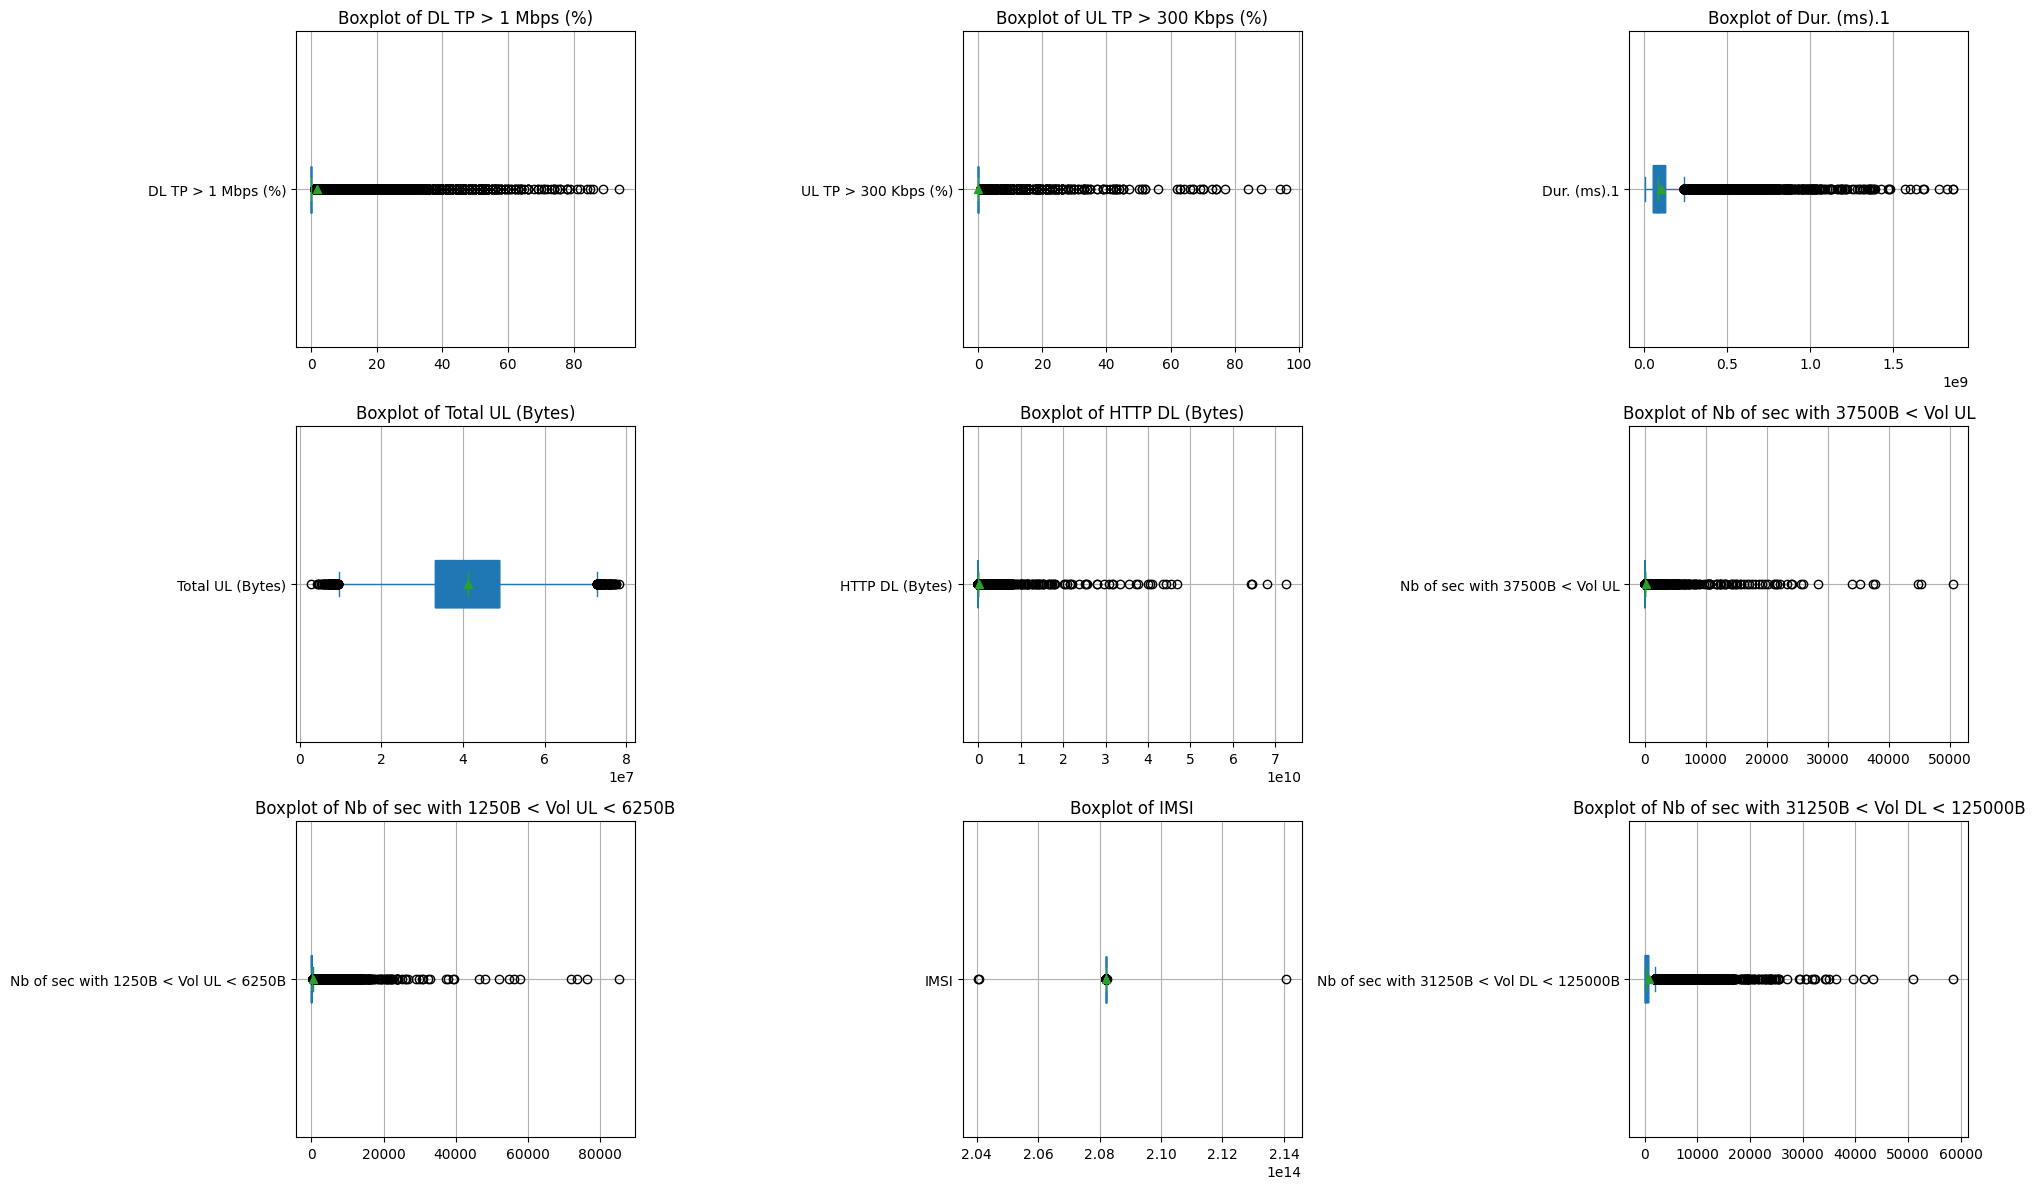

In [14]:
# Calculate grid dimensions based on number of columns in the subset
num_cols = 3  # Choose a fixed number of columns for the subplots
num_rows = math.ceil(len(numerical_cols_subset) / num_cols)

# Create the subplots (fixed grid size)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Flatten the axes array to easily iterate over them
axes = axes.flatten()

for i, col in enumerate(numerical_cols_subset):
    visualize.plot_boxplot(df, col, ax=axes[i])

# Hide extra subplots (if any)
for j in range(len(numerical_cols_subset), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

# User Overview Analysis

In [71]:
user_data = df.groupby('IMSI')

#### Session duration

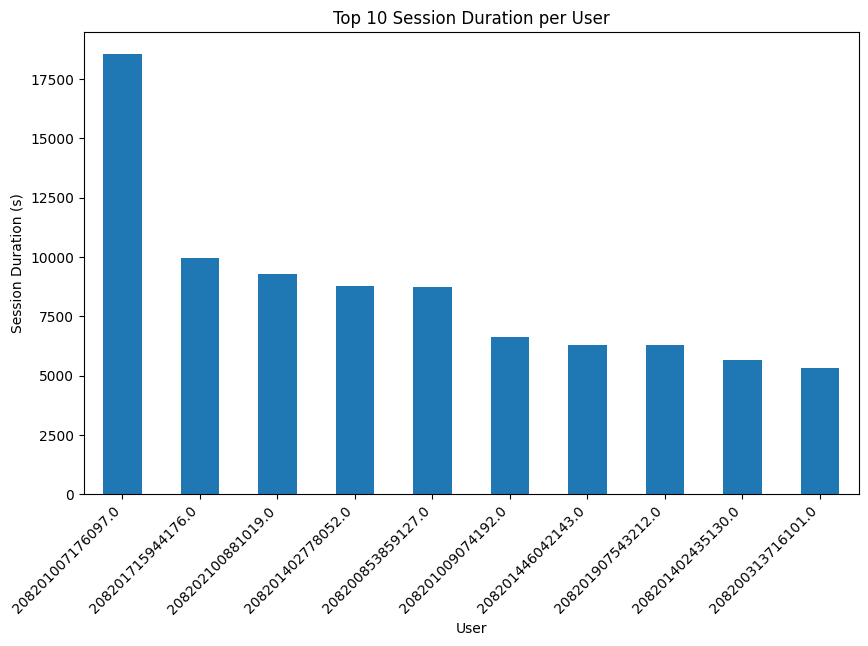

In [16]:
num_duration_per_user = user_data['Dur. (ms)'].sum() / 1000 # Convert it to seconds

top_10_session_duration = num_duration_per_user.sort_values(ascending=False).head(10)


# Visualize top 10 session_duration_per_user using plot_bar method
visualize.plot_bar(top_10_session_duration, xlabel="User", ylabel="Session Duration (s)", title="Top 10 Session Duration per User")

#### The total download and upload data

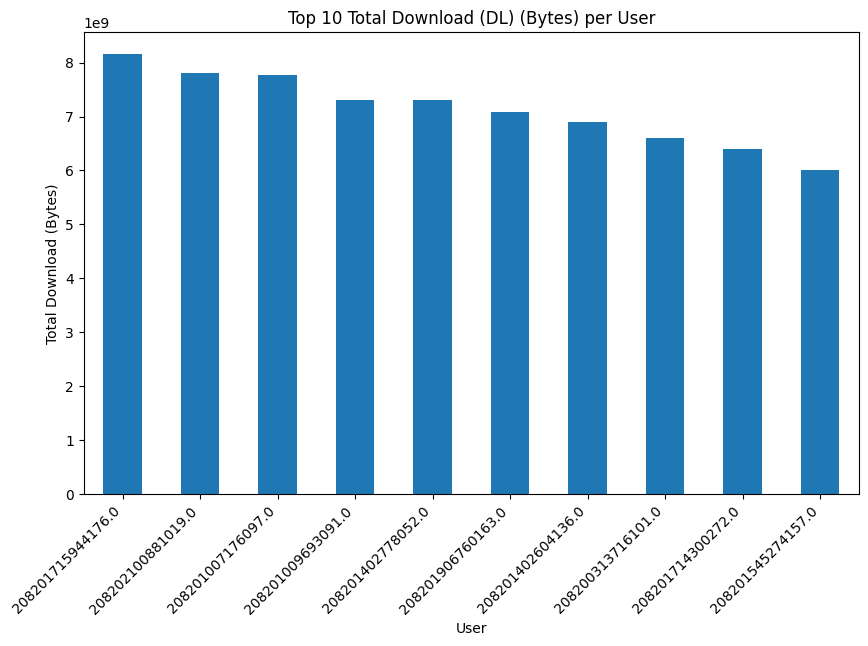

In [17]:
total_dl_user = user_data['Total DL (Bytes)'].sum()

top_10_total_dl = total_dl_user.sort_values(ascending=False).head(10)

visualize.plot_bar(top_10_total_dl, xlabel="User", ylabel="Total Download (Bytes)", title="Top 10 Total Download (DL) (Bytes) per User")

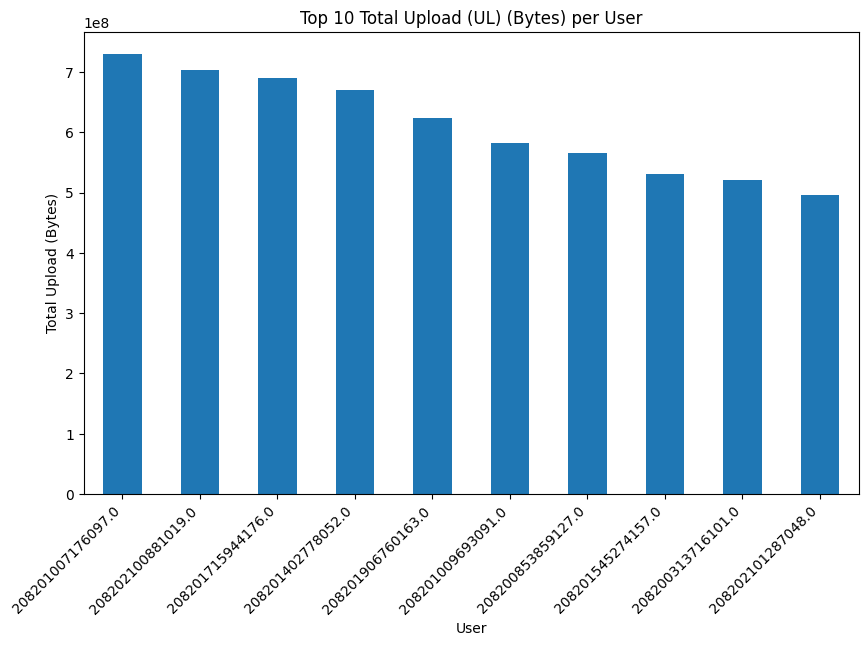

In [18]:
total_ul_user = user_data['Total UL (Bytes)'].sum()

top_10_total_ul = total_ul_user.sort_values(ascending=False).head(10)

visualize.plot_bar(top_10_total_ul, xlabel="User", ylabel="Total Upload (Bytes)", title="Top 10 Total Upload (UL) (Bytes) per User")

#### Total data volume during the session for each application

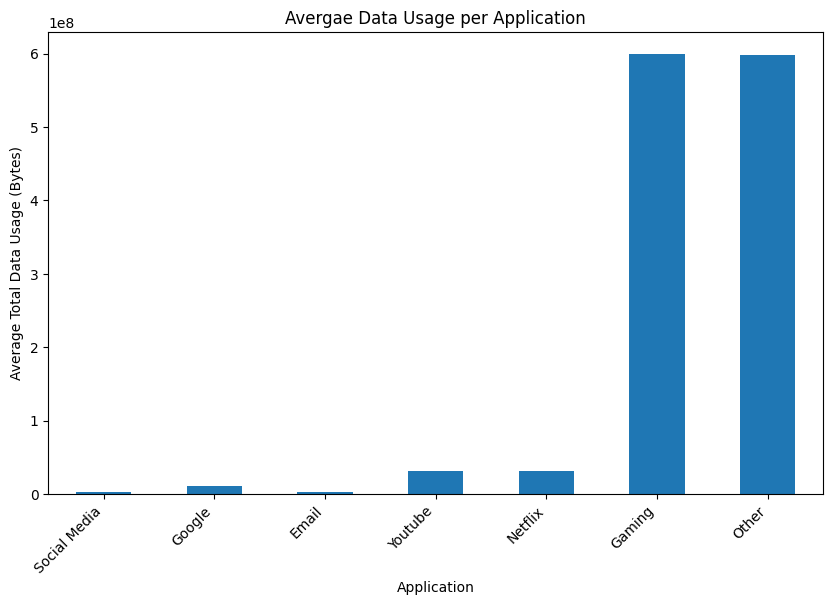

In [19]:
# Storing the applications
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

total_data__volume_per_user = {}

# Storing the total data volume (in bytes) for each application in total_data__volume_per_user
for app in applications:
    dl_col = f'{app} DL (Bytes)'
    ul_col = f'{app} UL (Bytes)'
    total_data__volume_per_user[app] = user_data[dl_col].sum() + user_data[ul_col].sum()


# Converting it to DataFrame
aggregated_data = pd.DataFrame(total_data__volume_per_user)


average_usage = aggregated_data.mean()


visualize.plot_bar(average_usage, xlabel = 'Application', ylabel='Average Total Data Usage (Bytes)', title='Avergae Data Usage per Application')

In [74]:
# Storing the applications
applications = ['Social Media', 'Google', 'Email', 'Youtube', 'Netflix', 'Gaming', 'Other']

total_data__volume_per_user = {}

# Storing the total data volume (in bytes) for each application in total_data__volume_per_user
for app in applications:
    dl_col = f'{app} DL (Bytes)'
    ul_col = f'{app} UL (Bytes)'
    total_data__volume_per_user[app] = user_data[dl_col].sum() + user_data[ul_col].sum()


# Converting it to DataFrame
aggregated_data = pd.DataFrame(total_data__volume_per_user)


average_usage = aggregated_data.mean()

## Data Insights

Our initial exploration reveals some interesting details about the dataset:

* **Outliers:** Several numerical columns appear to contain outliers, which are data points that deviate significantly from the majority. These outliers could potentially skew the results of any analysis. We might need to consider strategies to handle them, such as capping outliers, winsorizing, or removal (depending on the context).

* **Missing Values:** We observed columns with a high proportion of missing values (null data points).  Discarding these columns entirely might result in data loss.  Instead, we can explore imputation techniques to fill in these missing values with appropriate estimates based on the remaining data.

* **Data Type Conversion:** Two columns, 'Start' and 'End', likely represent timestamps.  Converting them to datetime data type will enable us to perform temporal analysis and manipulation more effectively.

* **Dimensionality Reduction:** With 55 columns, the dataset might benefit from dimensionality reduction techniques. 

These findings provide a starting point for data cleaning and preprocessing before diving deeper into analysis.

# Preprocessing

In [29]:
preprocessor = PreprocessingUtils()

#### Preprocessing  the datetime columns

In [21]:
df = preprocessor.preprocess_date_col(df)

#### Removing columns with high missing data (>30%)

In [23]:
df = preprocessor.drop_columns_with_null(df)

#### Filling in Missing Data (Imputation)

In [24]:
df = preprocessor.impute_nulls(df)

#### Converting Floats to Ints without Data Loss

In [25]:
df = preprocessor.convert_to_float_to_int_if_possible(df)

#### Encode Categorical Columns

In [26]:
df = preprocessor.encode_categorical_data(df)

#### Scale The Data

In [27]:
df = preprocessor.scale_data(df)

##### Remove The Outliers on entire columns

In [28]:
df_out =  preprocessor.remove_outliers_from_dataframe(df, df.columns)

#### Applying Dimensionality Reduction

In [29]:
df_reduced = preprocessor.reduce_dimensionality(df_out)

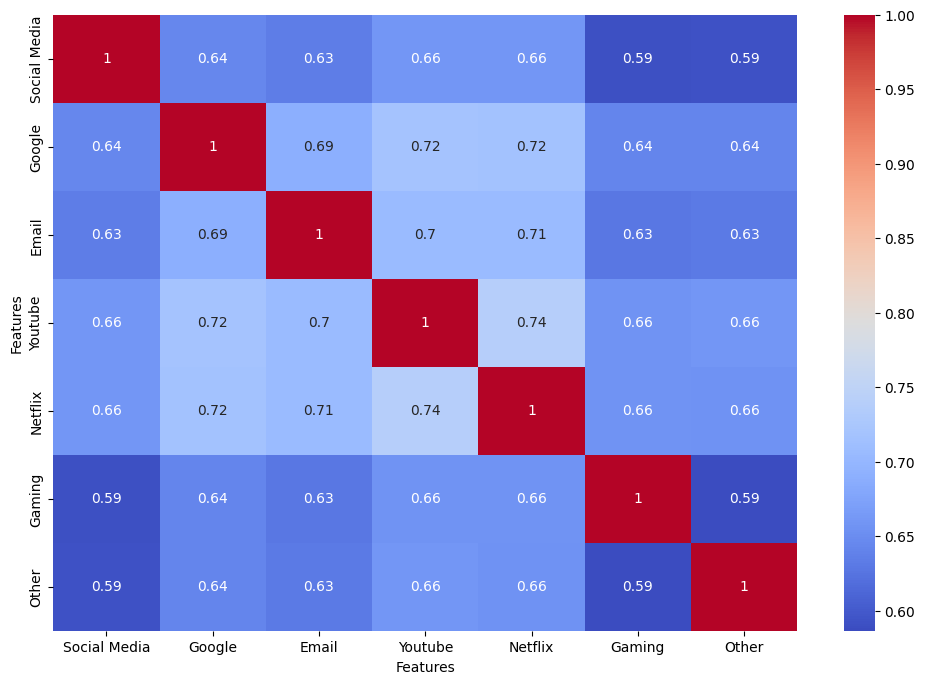

In [32]:
visualize.plot_heatmap_correlation(aggregated_data)

## Experience Analytics

In [82]:
engagement_metrics = df.groupby('MSISDN/Number').agg({
    'Bearer Id': 'count', # Session frequency
    'Dur. (ms)': 'sum', # Total session duration in millieseconds
    'Total DL (Bytes)': 'sum', # Total download data volume
    'Total UL (Bytes)': 'sum' # Total upload data volume
})

top_10_sessions = engagement_metrics['Bearer Id'].nlargest(10)
top_10_session_duration = engagement_metrics['Dur. (ms)'].nlargest(10)
top_10_total_traffic = (engagement_metrics['Total DL (Bytes)'] + engagement_metrics['Total UL (Bytes)']).nlargest(10)

##### Top Ten Customer by Session Frequency

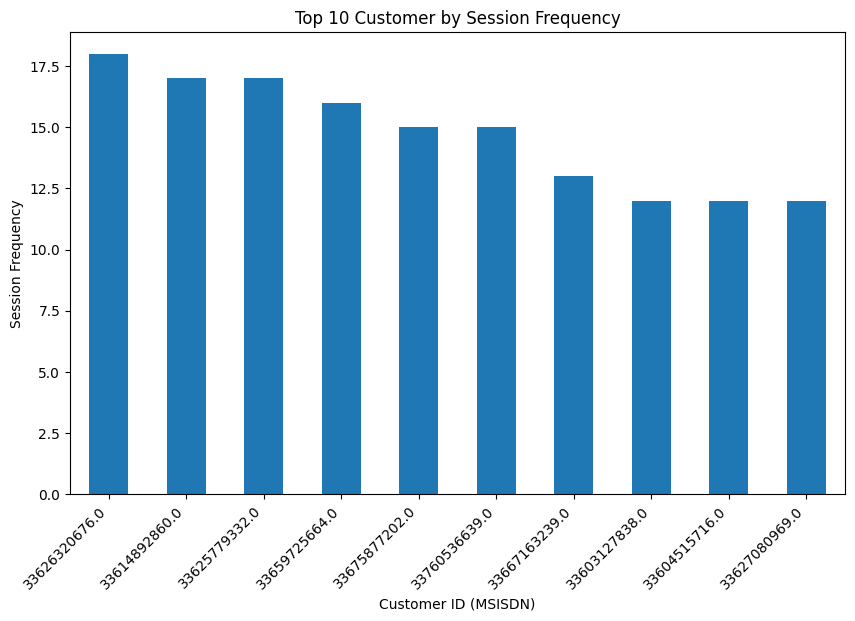

In [27]:
visualize.plot_bar(top_10_sessions, xlabel = 'Customer ID (MSISDN)', ylabel='Session Frequency', title='Top 10 Customer by Session Frequency')

#### Top Ten Customers By Session Duration

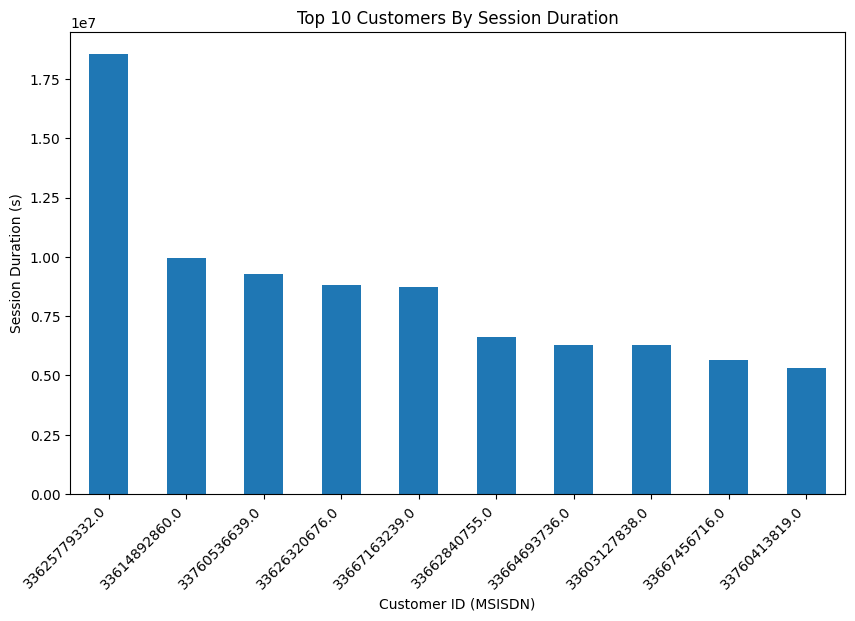

In [26]:
visualize.plot_bar(top_10_session_duration, xlabel = 'Customer ID (MSISDN)', ylabel='Session Duration (s)', title='Top 10 Customers By Session Duration')

#### Top Ten Customers by Total Session traffic

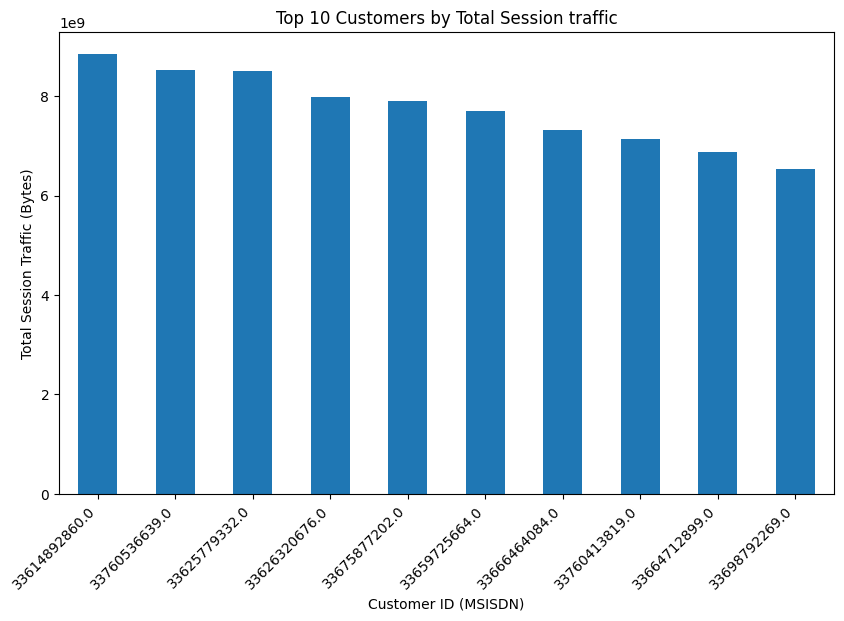

In [28]:
visualize.plot_bar(top_10_total_traffic, xlabel = 'Customer ID (MSISDN)', ylabel='Total Session Traffic (Bytes)', title='Top 10 Customers by Total Session traffic')

#### Clustering

In [30]:
normalized_engamenment_metrics = preprocessor.scale_data(engagement_metrics)

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit(normalized_engamenment_metrics)

engagement_metrics['cluster'] = clusters.labels_

engagement_cluster_count = engagement_metrics['cluster'].value_counts().to_frame().reset_index()

<Figure size 1000x600 with 0 Axes>

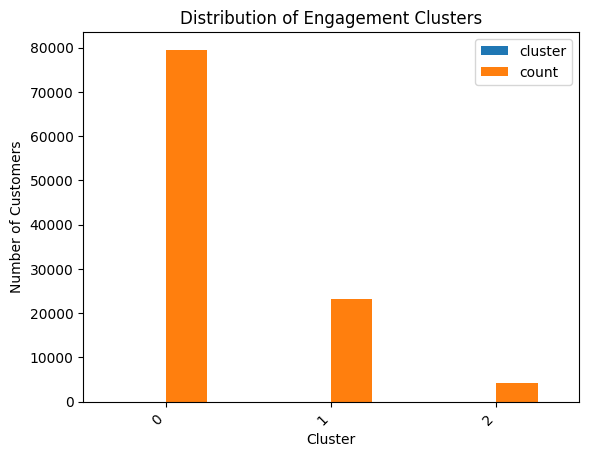

In [52]:
visualize.plot_bar(engagement_cluster_count,  xlabel = 'Cluster', ylabel='Number of Customers', title='Distribution of Engagement Clusters')

In [84]:
app_traffic = df.groupby('MSISDN/Number').agg({
    'Social Media DL (Bytes)': 'sum',
    'Google DL (Bytes)': 'sum',
    'Email DL (Bytes)': 'sum',
    'Youtube DL (Bytes)': 'sum',
    'Netflix DL (Bytes)': 'sum',
    'Gaming DL (Bytes)': 'sum',
    'Other DL (Bytes)': 'sum',
})


# Calculate total traffic for each user
app_traffic['Total Traffic'] = app_traffic.sum(axis=1)


In [85]:
app_traffic['Youtube DL (Bytes)'].nlargest()

MSISDN/Number
3.362578e+10    237883033.0
3.361489e+10    199823443.0
3.376054e+10    194068298.0
3.362708e+10    187323322.0
3.376041e+10    174245981.0
Name: Youtube DL (Bytes), dtype: float64